In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_features = ['size(sqft)','bedrooms','floors','age']

m=X_train.shape[0]
print(f"x_train : {X_train} x_train_shape: {X_train.shape} m: {m}")


x_train : [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]] x_train_shape: (3, 4) m: 3


In [3]:
def z_normalization(X):
    mu=np.mean(X)
    sd=np.std(X)
    X_norm=(X-mu)/sd

    return X_norm

In [4]:
X_norm=z_normalization(X_train)
print(f"Standard Data: {X_norm} without : {X_train}")

# X = np.c_[X_norm, X_norm**2, X_norm**3]
# print(X)

# Y=1+X**2

Standard Data: [[ 2.55999942 -0.54872999 -0.5546542  -0.48948788]
 [ 1.54103523 -0.55169209 -0.55317315 -0.49689315]
 [ 0.70572156 -0.55317315 -0.5546542  -0.50429841]] without : [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


In [5]:
def predict(X,w,b):
    f_wb=np.dot(X,w)+b

    return f_wb

In [6]:
def compute_cost(X,y,w,b):
    total_cost=0
    m=X.shape[0]
    for i in range(m):
        cost=(predict(X[i],w,b)-y[i])**2
        total_cost+=cost
    
    return total_cost/(2*m)

In [7]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0
    for i in range(m):
        err=(predict(X[i],w,b)-y[i])
        for j in range(n):
            dj_dw[j]+= err * X[i,j]
        dj_db+= err

    dj_dw= dj_dw/m
    dj_db= dj_db/m

    return dj_dw,dj_db

In [8]:
def gradient_descent(X,y,w,b,iteration,alpha):
    j_hist=[]
    for i in range(iteration):
        dj_dw,dj_db=compute_gradient(X,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<400:
            j_hist.append(compute_cost(X,y,w,b))

    return w,b,j_hist



In [9]:
b_init = 0
w_init = np.zeros(4)
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)} m: {m}")

w_init shape: (4,), b_init type: <class 'int'> m: 3


In [10]:
alpha=alpha = 8.0e-2
iterations=250
w_final,b_final,j_hist=gradient_descent(X_norm,y_train,w_init,b_init,iterations,alpha)


for i in range(m):
    print(f"prediction: {predict(X_norm[i], w_final, b_final)} actual value: {y_train[i]}")

prediction: 437.8132874226631 actual value: 460
prediction: 280.64666729768555 actual value: 232
prediction: 151.8453547005123 actual value: 178


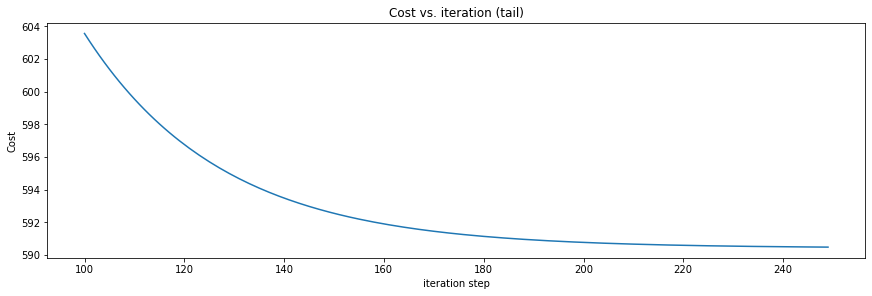

In [11]:
fig, (ax2) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])
ax2.set_title("Cost vs. iteration (tail)")
ax2.set_ylabel('Cost') 
ax2.set_xlabel('iteration step') 
plt.show()